# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


h_train=pd.read_csv("train.csv")
h_train['SalePrice']=np.log(h_train['SalePrice'])
pearsonc=h_train.corr(method ='pearson')
corr_target=abs(pearsonc['SalePrice'])
top=corr_target[corr_target>0.5]
sort=top.sort_values(ascending = False)
print(sort)
data={'SalePrice':h_train['SalePrice'],'OverallQual':h_train['OverallQual'],'GrLivArea':h_train['GrLivArea'],'GarageCars':h_train['GarageCars'],'GarageArea':h_train['GarageArea'],'TotalBsmtSF':h_train['TotalBsmtSF'],'1stFlrSF':h_train['1stFlrSF'],'FullBath':h_train['FullBath'],'YearBuilt':h_train['YearBuilt'],'YearRemodAdd':h_train['YearRemodAdd'],'GarageYrBlt':h_train['GarageYrBlt'],'TotRmsAbvGrd':h_train['TotRmsAbvGrd']}
data=pd.DataFrame(data)




SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64


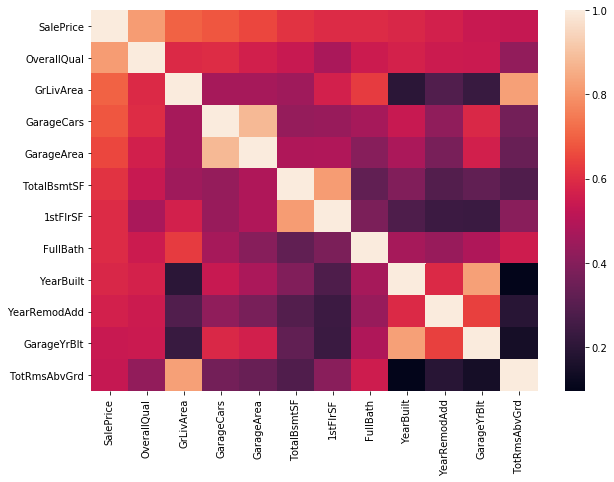

In [2]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(method ='pearson'))

The variables which have the correlation > 0.5 with the SalePrice are printed above. From the Heatmap we can concur that
(GarageCars and GarageArea), (OverallQual and SalePrice) and (TotalBsmtSF and 1stFlrSF) have the most positive correlation
While (YearBuilt and GrLiveArea), (GarageYrBlt and GrLiveArea) ,(TotalRmsAbvGrnd and YearBuilt) and (TotalRmsAbvGrnd and GarageYrBlt) has the most negative correlation

## Part 2 - Informative Plots

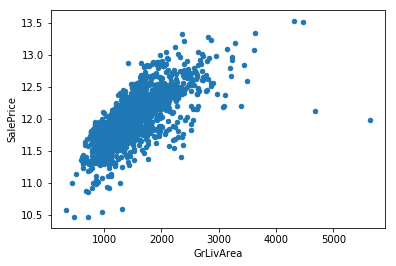

In [3]:
data1={'1stFlrSF':h_train['1stFlrSF'],'SalePrice':h_train['SalePrice']}
data1=pd.DataFrame(data1)
h_train.plot.scatter(x="GrLivArea", y="SalePrice")

By seeing the above scatterplot matrix we can say that GrLivArea is directly proportional to SalePrice.The GrLivArea increases with the increase in the SalePrice

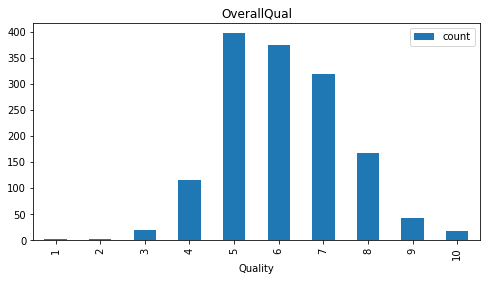

In [4]:
df1=h_train.groupby('OverallQual')
l1=[]
l2=[]
for name,grp in df1:
    l1.append(name)
    l2.append(grp.shape[0])
data2 = {"Quality":l1,"count":l2}
df_fin=pd.DataFrame(data2)
#print(df_fin)
df_fin.plot(kind='bar',x="Quality",y="count",title='OverallQual',figsize=(8,4))

From the above graph we concur that people are mostly buying the houses with the OverallQual of 5 , 6 , 7. 
1 and 2 star OverallQual houses are almost not bought by any one
9 and 10 star OverallQual Houses are sold in very few numbers because they are expensive and only few can afford it.

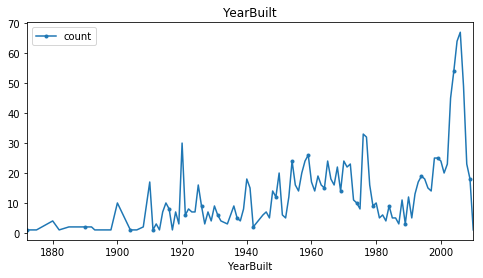

In [5]:
df3=h_train.groupby('YearBuilt')
l5=[]
l6=[]
for name,grp in df3:
    l5.append(name)
    l6.append(grp.shape[0])

data3 = {"YearBuilt":l5,"count":l6}
df_fin=pd.DataFrame(data3)
#print(df_fin[df_fin['YearBuilt']==2004])
df_fin.plot(kind='line',x="YearBuilt",y="count",title='YearBuilt',style='.-',markevery=5,figsize=(8,4))

From the above the graph number of house sales between 1872 - 2010 are visualized. As we can see number of sales on the houses built in the year 2004 2005 2006 are the highest.The number of sales of the houses that are old are very few and the least.There is some spike in the sales of the houses that are built around 1920 and 1976.

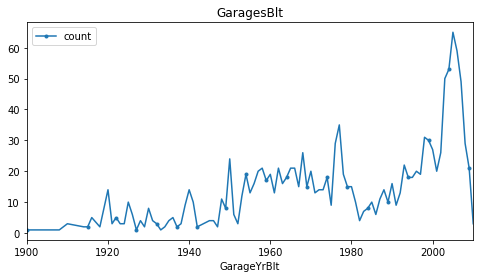

In [6]:
df3=h_train.groupby('GarageYrBlt')
l9=[]
l10=[]
for name,grp in df3:
    l9.append(name)
    l10.append(grp.shape[0])
data3 = {"GarageYrBlt":l9,"count":l10}
df_fin=pd.DataFrame(data3)

df_fin.plot(kind='line',x="GarageYrBlt",y="count",title='GaragesBlt',style='.-',markevery=5,figsize=(8,4))

From the above the graph number of house sales between 1900 - 2010 are visualized. As we can see number of sales of the house whose Garages are built in the year 2004 2005 2006 are the highest.There is some spike in the sales of the houses whose that are built around 1920,1940,1950 and 1976.From the above 2 line graphs we can notice some similarities they are atleast 60% similiar from this we can say that most houses who bought the houses have their Garages built in the same year.

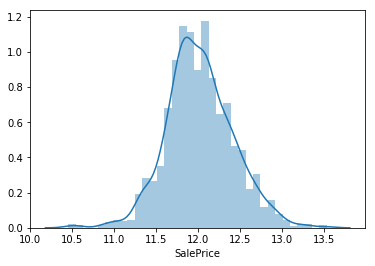

In [7]:
sns.distplot(h_train['SalePrice'])

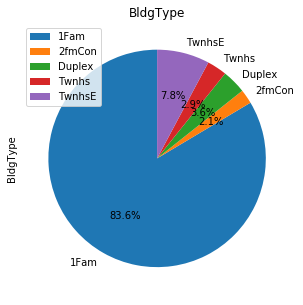

In [8]:
df2=h_train.groupby('BldgType')
l7=[]
l8=[]
for name,grp in df2:
    l7.append(name)
    l8.append(grp.shape[0])

data3 = {"BldgType":l8}
df_fin = pd.DataFrame(data3,columns=['BldgType'],index =l7 )

df_fin.plot.pie(y='BldgType',title='BldgType',figsize=(5, 5),autopct='%1.1f%%', startangle=90)

Above Pie Chart helps us understand that Single-family Detached houses are sold mostly with a percentage of 83.6 followed byTownhouse End Unit(7.8%),Dulplex(3.6%),Townhouse Inside Unit(2.9%) and 2FmCon Respectively(2.1%)


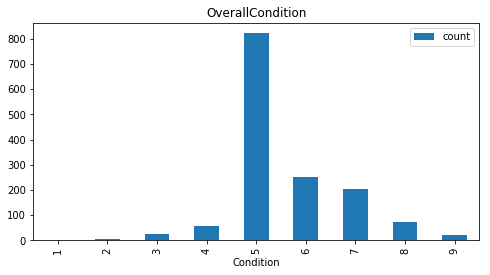

In [9]:
df2=h_train.groupby('OverallCond')
l3=[]
l4=[]
for name,grp in df2:
    l3.append(name)
    l4.append(grp.shape[0])

data3 = {"Condition":l3,"count":l4}
df_fin=pd.DataFrame(data3)
df_fin.plot(kind='bar',x="Condition",y="count",title='OverallCondition',figsize=(8,4))

From the above graph we concur that people are mostly buying the houses with the OverallCond of 5 . 
1 and 2 star OverallCond houses are almost not bought by any one
8 and 9 star OverallCond Houses are sold in very few numbers because they are expensive and only few can afford it.
on total 1-4 star rating overallCond houses are sold in very few in numbers 6-7 star rating overallCond houses are sold in moderate

## Part 3 - Handcrafted Scoring Function

In [10]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

h_test=pd.read_csv("test.csv")
cols=list(h_train.columns)
for i in cols:
    if np.issubdtype(h_train[i].dtype, np.number)=='True':
        h_train[i]=h_train[i].fillna(h_train[i].median())
    else:
        h_train[i]=h_train[i].fillna(h_train[i].mode())
        
h_train=h_train.fillna(method ='pad')
h_train=h_train.fillna(method ='bfill')
h_train=h_train.fillna(method ='ffill')        
h_train=h_train.fillna(-99)

cols=list(h_test.columns)        
for i in cols:
    if np.issubdtype(h_test[i].dtype, np.number)=='True':
        h_test[i]=h_test[i].fillna(h_test[i].median())
    else:
        h_test[i]=h_test[i].fillna(h_test[i].mode())
h_test=h_test.fillna(method ='pad')
h_test=h_test.fillna(method ='bfill')
h_test=h_test.fillna(method ='ffill')
#h_test=h_test.fillna(-99)    


n1=h_train.copy()
a1=n1.select_dtypes(include='object').columns
le = LabelEncoder()
for i in a1:
    n1[i]= le.fit_transform(n1[i].astype(str))
    
norm=(n1-n1.mean())/n1.std()
n1['score']=0.650888*norm['GarageArea']+0.489449*norm['Fireplaces']+0.036868*norm['OverallCond']+0.817184*norm['OverallQual']+0.586570*norm['YearBuilt']+0.209044*norm['BedroomAbvGr']+0.147548*norm['KitchenAbvGr']+0.594771*norm['FullBath']+0.700927*norm['GrLivArea']+0.612134*norm['TotalBsmtSF']+0.534422*norm['TotRmsAbvGrd']
n1['score']=n1['score']-norm['SalePrice']
l=n1.nlargest(10,'score')
l1=l['Id'].tolist()
print("*********************************************Top 10 desirable house ids***********************************************")
print(l1)
print("*********************************************Top 10 desirable house data***********************************************")
l.head(10)



*********************************************Top 10 desirable house ids***********************************************
[1299, 524, 1183, 692, 799, 497, 1170, 804, 119, 1143]
*********************************************Top 10 desirable house data***********************************************


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
1298  1299          60         3        313.0    63887       1      1   
523    524          60         3        130.0    40094       1      0   
1182  1183          60         3        160.0    15623       1      0   
691    692          60         3        104.0    21535       1      1   
798    799          60         3        104.0    13518       1      0   
496    497          20         3         60.0    12692       1      1   
1169  1170          60         3        118.0    35760       1      0   
803    804          60         3        107.0    13891       1      0   
118    119          60         3         90.0    12376       1      1   
1142  1143          60         3         77.0     9965       1      0   

      LotShape  LandContour  Utilities  ...  PoolQC  Fence  MiscFeature  \
1298         2            0          0  ...       2      2            2   
523          0            0          0  ...       0      2            2   
1182         0            3          0  ...       0      2            2   
691          0            3          0  ...       0      2            2   
798          3            3          0  ...       0      2            2   
496          0            3          0  ...       0      1            2   
1169         0            3          0  ...       1      2            2   
803          3            3          0  ...       0      2            2   
118          3            3          0  ...       2      2            2   
1142         3            3          0  ...       1      2            2   

      MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice      score  
1298        0       1    2008         6              5  11.982929  22.620651  
523         0      10    2007         6              5  12.126759  14.412437  
1182        0       7    2007         8              0  13.521139   9.876507  
691         0       1    2007         8              4  13.534473   9.748813  
798         0       7    2009         6              5  13.091904   8.505484  
496         0       5    2007         8              4  12.971540   7.878045  
1169        0       7    2006         8              4  13.345507   7.736594  
803         0       1    2009         6              5  13.275828   7.531399  
118         0       5    2010         8              4  12.676076   7.339744  
1142        0       4    2007         6              5  12.959539   7.096165  

[10 rows x 82 columns]

The ten Most desirable houses ids and their data are displayed above

In [11]:
sm=n1.nsmallest(10,'score')
sm1=sm['Id'].tolist()
print("*********************************************least 10 desirable house ids***********************************************")
print(sm1)
print("*********************************************least 10 desirable house data***********************************************")
sm.head(10)


*********************************************least 10 desirable house ids***********************************************
[376, 534, 1101, 1214, 1219, 637, 977, 529, 650, 1322]
*********************************************least 10 desirable house data***********************************************


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
375    376          30         3         65.0    10020       1      1   
533    534          20         3         50.0     5000       1      1   
1100  1101          30         3         60.0     8400       1      1   
1213  1214          80         3         50.0    10246       1      0   
1218  1219          50         4         52.0     6240       1      0   
636    637          30         4         51.0     6120       1      1   
976    977          30         3         51.0     5900       1      1   
528    529          30         3         58.0     9098       1      1   
649    650         180         4         21.0     1936       1      1   
1321  1322          20         3         70.0     6627       1      1   

      LotShape  LandContour  Utilities  ...  PoolQC  Fence  MiscFeature  \
375          0            2          0  ...       0      1            0   
533          3            2          0  ...       0      2            2   
1100         3            0          0  ...       1      2            2   
1213         0            3          0  ...       0      0            2   
1218         3            3          0  ...       0      2            2   
636          3            3          0  ...       0      0            2   
976          0            0          0  ...       1      0            2   
528          0            3          0  ...       0      2            2   
649          3            3          0  ...       0      2            2   
1321         0            3          0  ...       2      1            2   

      MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice     score  
375         0       3    2009         8              4  11.018629 -7.874836  
533         0       1    2007         8              4  10.578980 -7.533140  
1100        0       1    2009         8              4  11.002100 -6.819135  
1213        0       5    2006         8              4  11.884489 -6.620727  
1218        0       7    2006         8              4  11.296012 -6.113833  
636         0       1    2009         5              4  11.002100 -5.788951  
976         0       8    2006         8              4  11.356272 -5.779150  
528         0       7    2007         8              4  11.362103 -5.752571  
649         0      12    2007         8              4  11.344507 -5.508775  
1321        0       7    2008         8              4  11.191342 -5.424296  

[10 rows x 82 columns]

The ten Least Desirable house ids and their data is displayed above

## Part 4 - Pairwise Distance Function

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
f1=h_train.drop('Neighborhood',axis=1)
a1=f1.select_dtypes(include='object').columns
le = LabelEncoder()
for i in a1:
    f1[i]= le.fit_transform(f1[i].astype(str))
    
norm=(f1-f1.mean())/f1.std()
norm1=norm.iloc[[0]]
norm2=norm.iloc[[13]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)

def dist_mat(norm):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(norm)
    pca_sim_2= pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    ecd_dist=pdist(pca_sim_2,'euclidean')
    return ecd_dist

def dist_pca(norm):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(norm)
    pca_sim_3= pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    return pca_sim_3
distance_mat=dist_mat(df_norm)
print("the two records which are in the same neighborhood (ids 1 and 14) eucd_dis: {}".format(distance_mat))

norm1=norm.iloc[[0]]
norm2=norm.iloc[[290]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the same neighborhood (ids 1 and 291) eucd_dis: {}".format(distance_mat))

norm1=norm.iloc[[0]]
norm2=norm.iloc[[3]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the different neighborhood (ids 1 and 4) eucd_dis: {}".format(distance_mat))

norm1=norm.iloc[[0]]
norm2=norm.iloc[[313]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the different neighborhood (ids 1 and 314) eucd_dis: {}".format(distance_mat))

the two records which are in the same neighborhood (ids 1 and 14) eucd_dis: [8.63727428]
the two records which are in the same neighborhood (ids 1 and 291) eucd_dis: [7.94464251]
the two records which are in the different neighborhood (ids 1 and 4) eucd_dis: [10.28075141]
the two records which are in the different neighborhood (ids 1 and 314) eucd_dis: [25.29066119]


Exp1:
In the above we used the neighborhood CollgCr. The distance between the first two records which have the same neighborhood are very close in number whereas if we see the last two records they are very far from the first two.

In [13]:
norm1=norm.iloc[[243]]
norm2=norm.iloc[[244]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the same neighborhood (ids 244 and 245) eucd_dis: {}".format(distance_mat))


norm1=norm.iloc[[243]]
norm2=norm.iloc[[252]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the same neighborhood (ids 244 and 253) eucd_dis: {}".format(distance_mat))


norm1=norm.iloc[[243]]
norm2=norm.iloc[[242]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the different neighborhood (ids 244 and 243) eucd_dis: {}".format(distance_mat))
norm1=norm.iloc[[243]]
norm2=norm.iloc[[58]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the different neighborhood (ids 244 and 59) eucd_dis: {}".format(distance_mat))


norm1=norm.iloc[[243]]
norm2=norm.iloc[[43]]
df_norm = pd.concat([norm2, norm1]).reset_index(drop = True)
distance_mat=dist_mat(df_norm)
print("the two records which are in the different neighborhood (ids 244 and 44) eucd_dis: {}".format(distance_mat))



the two records which are in the same neighborhood (ids 244 and 245) eucd_dis: [8.95808829]
the two records which are in the same neighborhood (ids 244 and 253) eucd_dis: [8.36235197]
the two records which are in the different neighborhood (ids 244 and 243) eucd_dis: [11.17422539]
the two records which are in the different neighborhood (ids 244 and 59) eucd_dis: [14.6802758]
the two records which are in the different neighborhood (ids 244 and 44) eucd_dis: [10.71487342]


Exp2:
In the above we used the neighborhood SawyerW. The distance between the first two records which have the same neighborhood are very close in number whereas if we see the last three records they are very far from the first two.

In the distance function I used PCA for finding the top two similar properties, we can get the euclidean distance to thoses with same or different neighborhood (which ever we want) by using the pdist. 

## Part 5 - Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

distance_mat1=dist_mat(norm)
df_pca =dist_pca(norm)
dist=squareform(distance_mat1)
clustering = AgglomerativeClustering(n_clusters=6,affinity='precomputed',linkage='complete')
clustering.fit(dist)
clusters=clustering.labels_
#print(clusters)
#clustering_k = KMeans(n_clusters=6)#,precompute_distances=True)
#clustering_k.fit(dist)
#clusters_k=clustering_k.labels_
d_n={'Id':h_train['Id'],'Neighborhood':h_train['Neighborhood'],'SalePrice':np.exp(h_train['SalePrice']),'Clusters':clusters}
data_n=pd.DataFrame(d_n)
#print(data_n)
data_n['pc1'] = df_pca['pc1']
data_n['pc2'] = df_pca['pc2']
print(data_n.head(10))
unique=data_n.Neighborhood.unique()
print(len(unique))
cl0=data_n[data_n['Clusters']==0]
med_sp=cl0['SalePrice'].median()//1
print("****************************************************Neighborhoods for cluster 0****************************************")
print("SalePrice for cluster 0:  {}".format(med_sp))
cl0_n=cl0.Neighborhood.unique()
print(cl0_n)
#print(cl1)
cl1=data_n[data_n['Clusters']==1]
med_sp=cl1['SalePrice'].median()//1
print("****************************************************Neighborhoods for cluster 1****************************************")
print("SalePrice for cluster 1:  {}".format(med_sp))
cl1_n=cl1.Neighborhood.unique()
print(cl1_n)
cl2=data_n[data_n['Clusters']==2]
med_sp=cl2['SalePrice'].median()//1
print("****************************************************Neighborhoods for cluster 2****************************************")
print("SalePrice for cluster 2:  {}".format(med_sp))
cl2_n=cl2.Neighborhood.unique()
print(cl2_n)
cl3=data_n[data_n['Clusters']==3]
med_sp=cl3['SalePrice'].median()//1
print("****************************************************Neighborhoods for cluster 3****************************************")
print("SalePrice for cluster 3:  {}".format(med_sp))
cl3_n=cl3.Neighborhood.unique()
print(cl3_n)
cl4=data_n[data_n['Clusters']==4]
med_sp=cl4['SalePrice'].median()//1
print("****************************************************Neighborhoods for cluster 4****************************************")
print("SalePrice for cluster 4:  {}".format(med_sp))
cl4_n=cl4.Neighborhood.unique()
print(cl4_n)
cl5=data_n[data_n['Clusters']==5]
med_sp=cl5['SalePrice'].median()//1
print("****************************************************Neighborhoods for cluster 5****************************************")
print("SalePrice for cluster 5:  {}".format(med_sp))
cl5_n=cl5.Neighborhood.unique()
print(cl5_n)






   Id Neighborhood  SalePrice  Clusters       pc1       pc2
0   1      CollgCr   208500.0         3  2.301907  0.057295
1   2      Veenker   181500.0         5  0.039991 -1.706619
2   3      CollgCr   223500.0         3  2.715077 -0.070798
3   4      Crawfor   140000.0         0 -1.444090  1.530644
4   5      NoRidge   250000.0         3  4.947350  1.195828
5   6      Mitchel   143000.0         5  0.359936 -2.715033
6   7      Somerst   307000.0         3  4.447529 -1.924859
7   8       NWAmes   200000.0         5  1.787388  0.354212
8   9      OldTown   129900.0         2 -3.942909  4.243042
9  10      BrkSide   118000.0         4 -3.813991 -0.865178
25
****************************************************Neighborhoods for cluster 0****************************************
SalePrice for cluster 0:  180999.0
['Crawfor' 'NridgHt' 'NAmes' 'CollgCr' 'ClearCr' 'Gilbert' 'NoRidge'
 'OldTown' 'SawyerW' 'IDOTRR' 'Somerst' 'Edwards' 'NWAmes' 'Sawyer'
 'Mitchel' 'Timber' 'SWISU' 'BrkSide' 'StoneB

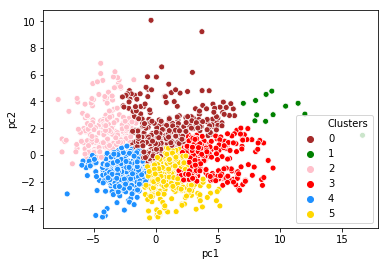

In [15]:
color = dict({0:'brown',1:'green',2: 'pink',3: 'red',4: 'dodgerblue',5: 'gold'})
sns.scatterplot(x="pc1", y="pc2", hue="Clusters", data=data_n, s=35,palette=color,legend='full')


## Part 6 - Linear Regression

In [16]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import decimal
import math
from sklearn.metrics import mean_squared_error

target=h_train['SalePrice']
new=h_train.drop('SalePrice',axis=1)
#new1=new1.drop('score',axis=1)
new_t=h_test
#a=['LandSlope','PavedDrive','GarageCars','GarageYrBlt','Fireplaces','TotRmsAbvGrd','KitchenAbvGr','LotFrontage','BedroomAbvGr','LotShape',
 # 'Neighborhood','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','LandSlope','BsmtHalfBath',
  #  'Heating','GrLivArea','FullBath','CentralAir','Id','Street','ExterCond','Foundation','BsmtFullBath','HalfBath','SaleCondition']
#b=[]
#for i in new1.columns:
#    if i not in a:
 #       b.append(i)
        
#for i in b:
 #   new1=new1.drop(i,axis=1)
  #  new2=new2.drop(i,axis=1)
#print(new1.head(5))
#print(new2.head(5))

'''The above code is for the selected variables   
'''    

k1=new.select_dtypes(include='object').columns
k2=new_t.select_dtypes(include='object').columns
le = LabelEncoder()
for i in k1:
    new[i]= le.fit_transform(new[i].astype(str))
for i in k2:
    new_t[i]= le.fit_transform(new_t[i].astype(str))

    
    
linear=linear_model.LinearRegression().fit(new,target)
predictions=linear.predict(new)
rmse=math.sqrt(mean_squared_error(target,predictions))
print('mean squared error: {} '.format(rmse))
p=linear.coef_
cols=new.columns
data_c=pd.DataFrame({"column Name":cols,'coeff':p})
c=data_c[data_c['coeff']>0]
print(c.sort_values(by=['coeff'],ascending=False))



pred=linear.predict(new_t)
pred=np.exp(pred)
print(pred[:5])

submit = pd.DataFrame({'Id': h_test['Id'], 'SalePrice': pred})
submit.to_csv('linear4.csv', index=False)


mean squared error: 0.13447120884839295 
      column Name         coeff
5          Street  1.889499e-01
41     CentralAir  7.565551e-02
17    OverallQual  7.022072e-02
61     GarageCars  6.330897e-02
47   BsmtFullBath  5.692213e-02
18    OverallCond  4.006829e-02
49       FullBath  3.804401e-02
11      LandSlope  3.763122e-02
56     Fireplaces  3.505768e-02
65     PavedDrive  2.525167e-02
79  SaleCondition  2.272891e-02
50       HalfBath  2.016216e-02
48   BsmtHalfBath  1.901218e-02
55     Functional  1.728632e-02
54   TotRmsAbvGrd  1.320406e-02
64     GarageCond  1.139986e-02
28      ExterCond  1.091247e-02
29     Foundation  1.022522e-02
8     LandContour  9.950450e-03
22       RoofMatl  9.172557e-03
35   BsmtFinType2  8.867079e-03
51   BedroomAbvGr  7.716519e-03
31       BsmtCond  7.196302e-03
21      RoofStyle  5.202755e-03
25     MasVnrType  4.357327e-03
24    Exterior2nd  3.194728e-03
19      YearBuilt  1.796188e-03
13     Condition1  1.682147e-03
74    MiscFeature  1.328120e-03

In the above i first used coff_ in simple linear regression model on variables to predict the pricing as a function of other variables. I used whole data to get the most important variable. I got the most important variable as OverallQual,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF and few others.By using all the data i got result as 0.147 in kaggle when i used the some of the most important variables (i used the "list a" which i kept in comments) from the above and predicted i got the result as 0.14427 in kaggle so from this i can say that there is a improvement in the rms value when compared to before.

## Part 7 - External Dataset

In [17]:
h_ext=pd.read_csv('ia-population-2019-10-21.csv')
df_train=pd.merge(h_train, h_ext, on='YearBuilt', how='left')
df_test=pd.merge(h_test, h_ext, on='YearBuilt', how='left')
print(df_train.shape)
cols=list(df_train)
for i in cols:
    if np.issubdtype(df_train[i].dtype, np.number)=='True':
        df_train[i]=df_train[i].fillna(df_train[i].median())
    else:
        df_train[i]=df_train[i].fillna(df_train[i].mode())
df_train=df_train.fillna(method ='pad')
df_train=df_train.fillna(method ='bfill')
df_train=df_train.fillna(method ='ffill')


cols=list(df_test.columns)        
for i in cols:
    if np.issubdtype(df_test[i].dtype, np.number)=='True':
        df_test[i]=df_test[i].fillna(df_test[i].median())
    else:
        df_test[i]=df_test[i].fillna(df_test[i].mode())
df_test=df_test.fillna(method ='pad')
df_test=df_test.fillna(method ='bfill')
df_test=df_test.fillna(method ='ffill')

new1=df_train.drop('SalePrice',axis=1)
new2=df_test
k1=new1.select_dtypes(include='object').columns
k2=new2.select_dtypes(include='object').columns
le = LabelEncoder()
for i in k1:
    new1[i]= le.fit_transform(new1[i].astype(str))
for i in k2:
    new2[i]= le.fit_transform(new2[i].astype(str))
linear=linear_model.LinearRegression().fit(new1,target)
predictions=linear.predict(new1)
rmse=math.sqrt(mean_squared_error(target,predictions))
print('mean squared error: {} '.format(rmse))
pred=linear.predict(new2)
pred=np.exp(pred)
print(pred[:5])
submit = pd.DataFrame({'Id': h_test['Id'], 'SalePrice': pred})
submit.to_csv('linear24.csv', index=False)


(1460, 87)
mean squared error: 0.13408106335451467 
[115301.87321645 145035.81813932 166145.84463361 192774.27558646
 184553.19533962]


https://www.macrotrends.net/cities/us/ia/ames/crime-rate-statistics
I got the dataset from the above link took the year and the respective data from the different csv files in this website.I got result around 0.14875 which is a little worse than what i got without using the External Dataset.So there is not much for the analysis but if there is some more features in the dataset then the result would have suprassed the previous one  

## Part 8 - Permutation Test

In [18]:
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import train_test_split
Variable1 = ['OverallQual','GrLivArea','GarageCars','GarageArea','YearBuilt','TotalBsmtSF']
Variable2 = ['BsmtFinSF2', 'BsmtHalfBath','YrSold', 'MiscVal', '3SsnPorch',]
train_train_data, test_test_data = train_test_split(h_train,test_size =0.5)
for var in Variable1:
  
    X = new[['Id',var]]
    Y = h_train['SalePrice']

    model = linear_model.LinearRegression()
    model.fit(X,Y)

    p = permutation_test_score(model,X,Y,cv=5,scoring="neg_mean_squared_error")
    print("P-value for important Variable {} ------- {}".format(var,p[2]))
print('**************************************************************************')
for var in Variable2:
  
    X = new[['Id',var]]
    Y = h_train['SalePrice']

    model = linear_model.LinearRegression()
    model.fit(X,Y)

    p = permutation_test_score(model,X,Y,cv=5,scoring="neg_mean_squared_error")
    print("P-value for least important Variable {} ------- {}".format(var,p[2]))

P-value for important Variable OverallQual ------- 0.009900990099009901
P-value for important Variable GrLivArea ------- 0.009900990099009901
P-value for important Variable GarageCars ------- 0.009900990099009901
P-value for important Variable GarageArea ------- 0.009900990099009901
P-value for important Variable YearBuilt ------- 0.009900990099009901
P-value for important Variable TotalBsmtSF ------- 0.009900990099009901
**************************************************************************
P-value for least important Variable BsmtFinSF2 ------- 0.6732673267326733
P-value for least important Variable BsmtHalfBath ------- 0.6732673267326733
P-value for least important Variable YrSold ------- 0.5544554455445545
P-value for least important Variable MiscVal ------- 0.7128712871287128
P-value for least important Variable 3SsnPorch ------- 0.7128712871287128


In the above we get the P-Value same for the first 6 variables because these are the important attributes and have high correlation with the target and the remaining vary from the first 6 vars because they are the least important variables

## Part 9 .Prediction

In [19]:
import lightgbm as lgb
from sklearn.preprocessing import LabelBinarizer


model = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720,max_bin = 55,
                          bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,feature_fraction_seed=9,
                          bagging_seed=9,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model.fit(new,target)

predictions=model.predict(new)
rmse=math.sqrt(mean_squared_error(target,predictions))
print('mean squared error: {} '.format(rmse))
pred=model.predict(new_t)
pred=np.exp(pred)
print(pred[:5])
submit = pd.DataFrame({'Id': h_test['Id'], 'SalePrice': pred})
submit.to_csv('lgb.csv', index=False)


mean squared error: 0.07485312839305892 
[122571.41767555 155539.3203524  184536.97120547 192570.32585664
 189244.72020948]


## Part 10 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/mohith9626

Highest Rank: 1533

Score: 0.12625

Number of entries:  11

Kaggle Photo

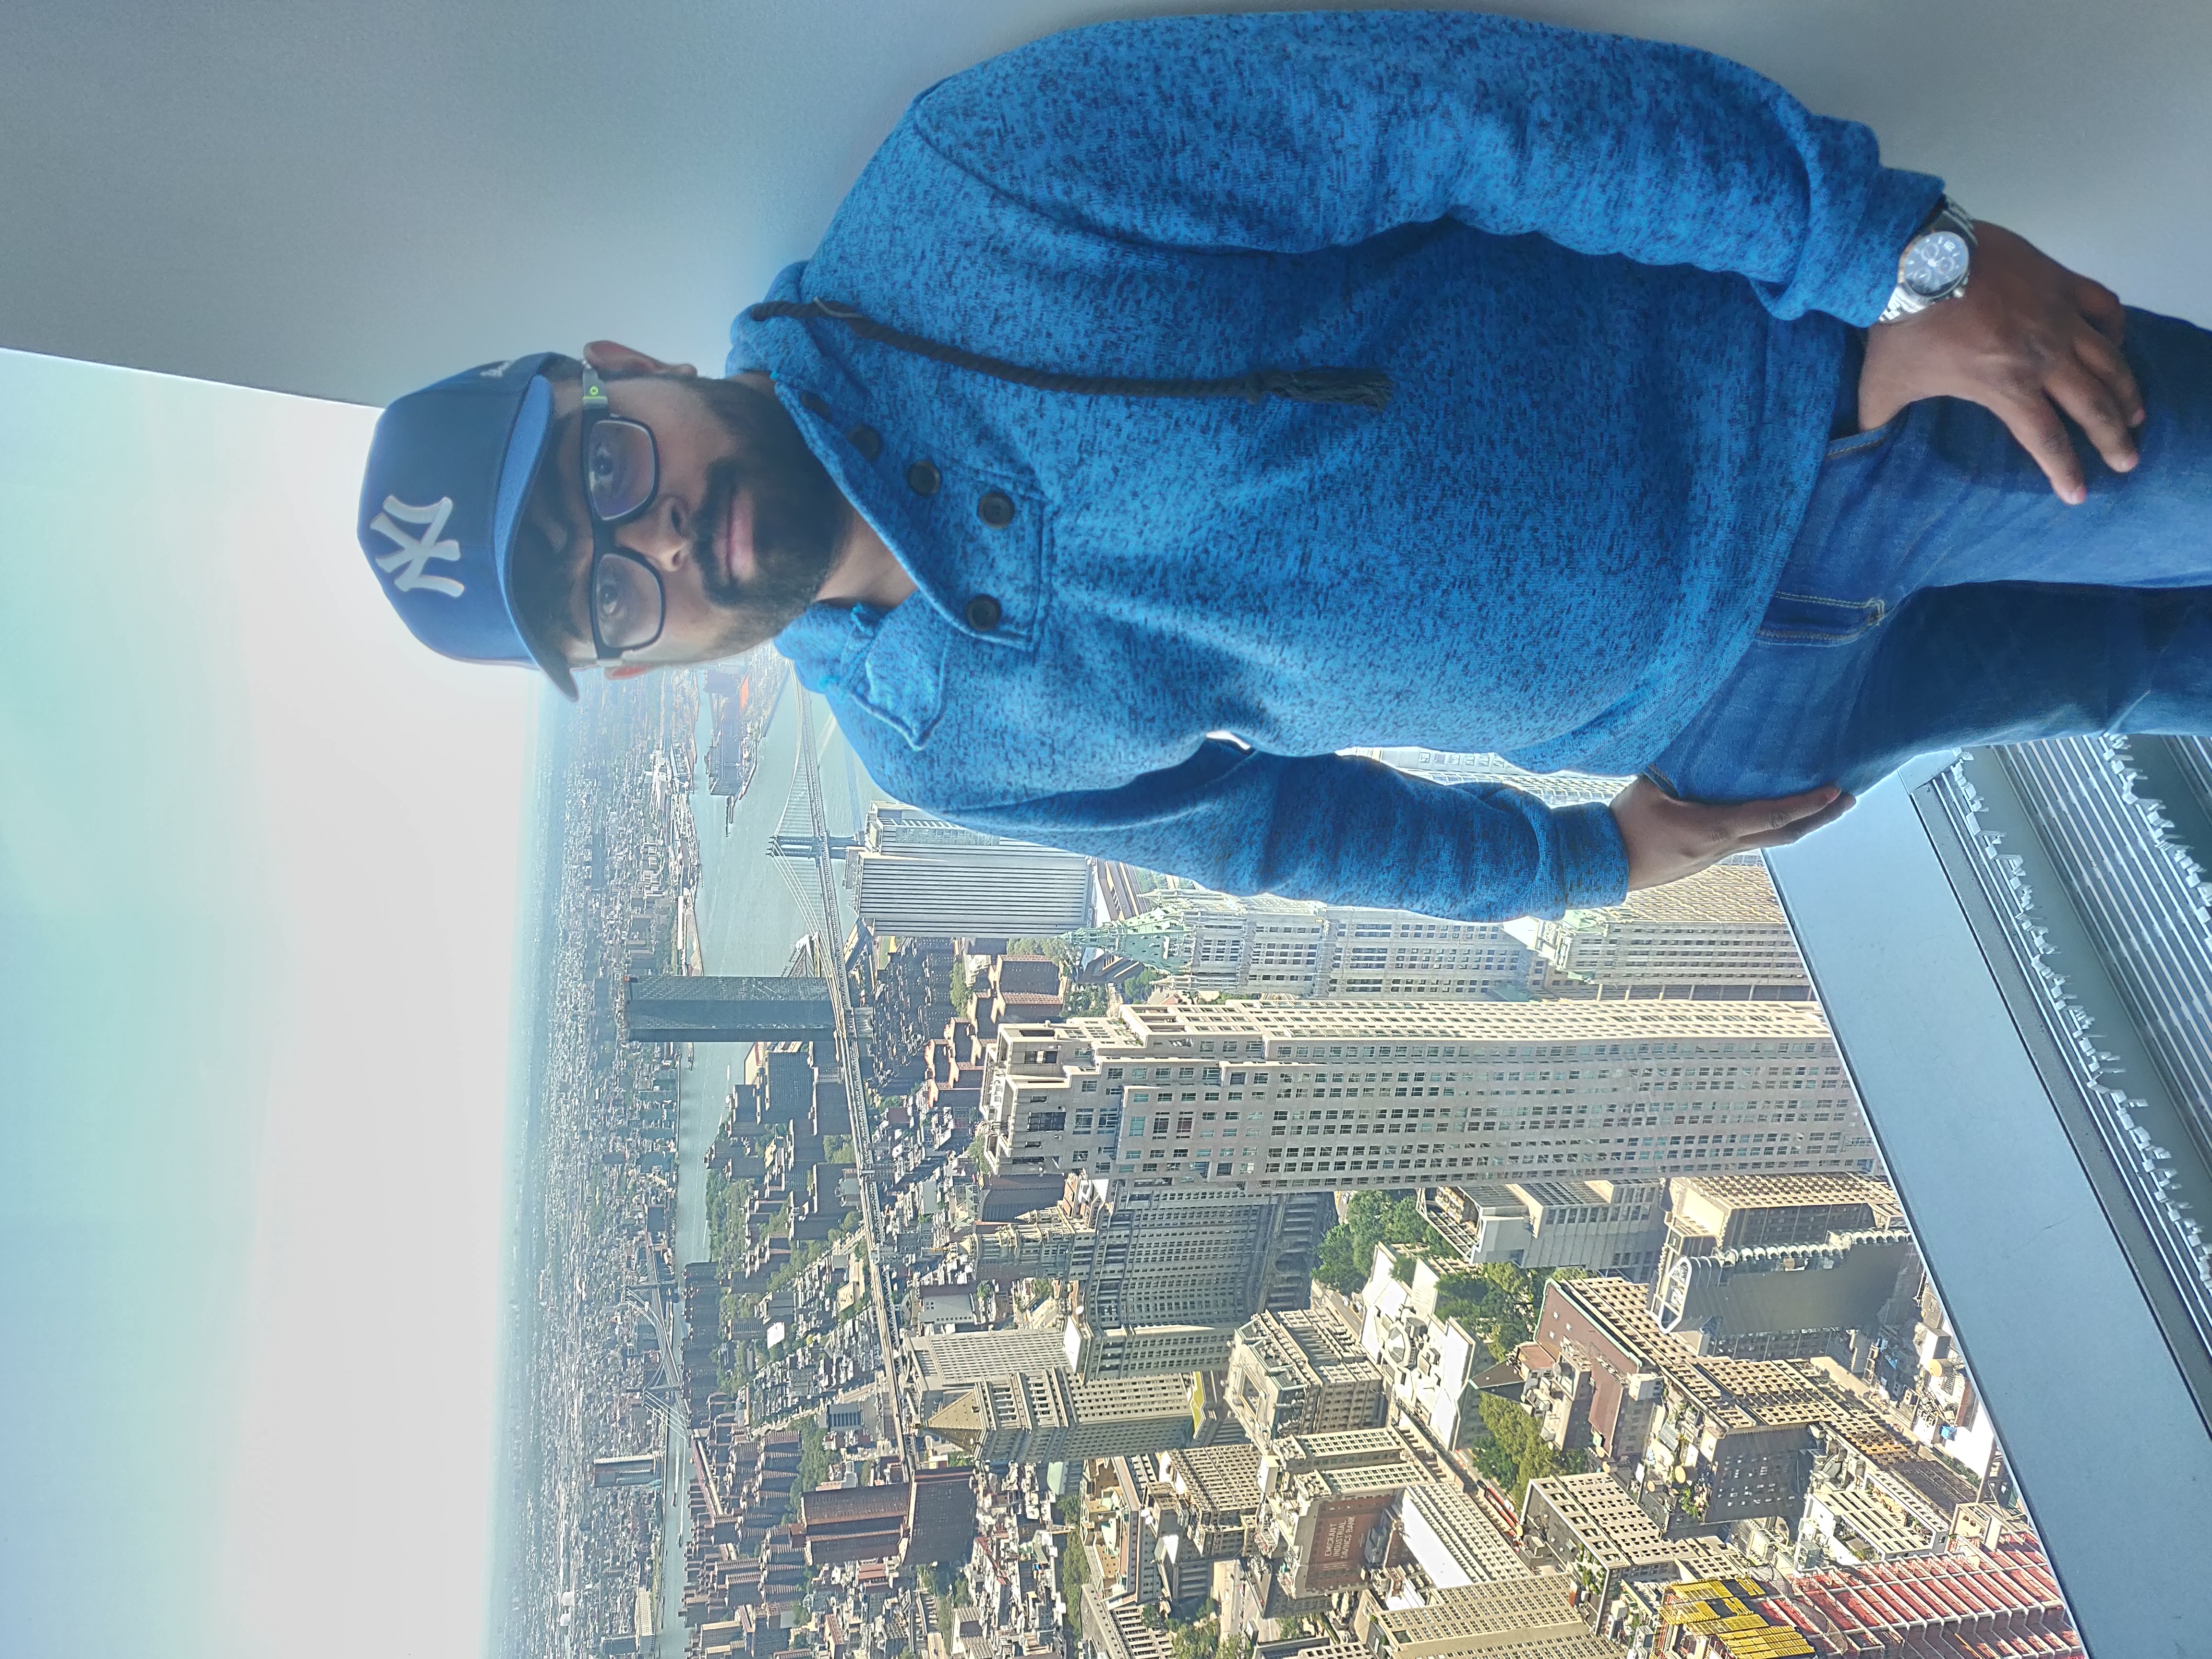

In [20]:
from IPython.display import Image
Image(filename="mohith.jpg",width=100,height=100)
